In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

certified_path = '/content/drive/MyDrive/Datathon/beginner.csv'
certified = pd.read_csv(certified_path)

census_path = '/content/drive/MyDrive/Datathon/sc-est2019-agesex-civ.csv'
census = pd.read_csv(census_path)

import warnings
warnings.filterwarnings("ignore")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
certified[certified['Address 1']=="Inc."]

,Facility Name,Address 1,Address 2,Address 3,City,State,Zip Code,Phone,Fax,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
6134,RedlandsFamilyPracticeMedicalGroup,Inc.,1700 North Waterman Avenue,NaN,NaN,San Bernardino,CA,92404,909883-861122272,909881-5707,NaN,NaN,NaN
7392,Sun Imaging,Inc.,824 N. Hill St,NaN,NaN,Los Angeles,CA,90012,213626-7816,213621-7787,NaN,NaN,NaN


In [ ]:
for i, row in certified.iterrows():
    for j, val in enumerate(row):
        if j > 4 and len(str(val)) == 2:
            for x in range(j-5):
              certified.loc[i, 'City':] = certified.loc[i, 'City':].shift(-1)
            break

In [2]:
# certified[certified['Address 1']=="Inc."]

In [ ]:
for i, row in certified.iterrows():
    if pd.isnull(row['State']) or len(row['State']) != 2:
         print(row)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/Datathon/beginner_clean.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
certified.to_csv(filepath)  

In [ ]:
facilities = certified['State'].value_counts().to_frame('facilities').reset_index().rename(columns={'index': 'State'})
facilities = facilities.iloc[:-6]
facilities = facilities[facilities['State'] != 'PR']
facilities.shape

(51, 2)

In [ ]:
state_abbreviations = {'AL':'Alabama', 'AK':'Alaska', 'AZ':'Arizona', 'AR':'Arkansas', 'CA':'California',
                      'CO':'Colorado', 'CT':'Connecticut', 'DC' :'District Of Columbia', 'DE':'Delaware', 'FL':'Florida', 'GA':'Georgia',
                      'HI':'Hawaii', 'ID':'Idaho', 'IL':'Illinois', 'IN':'Indiana', 'IA':'Iowa',
                      'KS':'Kansas', 'KY':'Kentucky', 'LA':'Louisiana', 'ME':'Maine', 'MD':'Maryland',
                      'MA':'Massachusetts', 'MI':'Michigan', 'MN':'Minnesota', 'MS':'Mississippi',
                      'MO':'Missouri', 'MT':'Montana', 'NE':'Nebraska', 'NV':'Nevada', 'NH':'New Hampshire',
                      'NJ':'New Jersey', 'NM':'New Mexico', 'NY':'New York', 'NC':'North Carolina',
                      'ND':'North Dakota', 'OH':'Ohio', 'OK':'Oklahoma', 'OR':'Oregon', 'PA':'Pennsylvania',
                      'RI':'Rhode Island', 'SC':'South Carolina', 'SD':'South Dakota', 'TN':'Tennessee',
                      'TX':'Texas', 'UT':'Utah', 'VT':'Vermont', 'VA':'Virginia', 'WA':'Washington',
                      'WV':'West Virginia', 'WI':'Wisconsin', 'WY':'Wyoming'}

facilities['Full_State'] = facilities['State'].map(state_abbreviations)
facilities.sort_values(by='Full_State', inplace=True, ignore_index=True)
print(facilities)

   State  facilities            Full_State
0     AL         142               Alabama
1     AK          33                Alaska
2     AZ         171               Arizona
3     AR          83              Arkansas
4     CA         761            California
5     CO         138              Colorado
6     CT         114           Connecticut
7     DE          30              Delaware
8     DC          16  District Of Columbia
9     FL         628               Florida
10    GA         277               Georgia
11    HI          37                Hawaii
12    ID          49                 Idaho
13    IL         335              Illinois
14    IN         179               Indiana
15    IA         145                  Iowa
16    KS         109                Kansas
17    KY         144              Kentucky
18    LA         145             Louisiana
19    ME          48                 Maine
20    MD         132              Maryland
21    MA         155         Massachusetts
22    MI   

In [ ]:
census.isna()
census.dropna(inplace = True)


In [ ]:
census.drop_duplicates(inplace = True)

In [ ]:
agedf = census[(census['AGE']>=40)&(census['AGE']<=75)&(census['SEX']==2)&(census['STATE']!=0)]

In [ ]:
clients = pd.DataFrame(columns=['pop'])

for i in range(56):
  df = {'pop': 0}
  clients = clients.append(df, ignore_index = True)

In [ ]:
for i, row in agedf.iterrows():
    if row[3] > 0 and row[3] <= 56:
      clients.at[row[3]-1, 'pop'] += row['POPEST2019_CIV']

clients = clients[clients['pop'] != 0].reset_index()

clients.shape

(51, 2)

In [ ]:
df = pd.concat([facilities, clients], axis=1).drop(['index'], axis=1)
df['ratio'] = df['pop'] / df['facilities']
df['ratio'] = df['ratio'].apply(lambda x: round(x, 2))
df

,State,facilities,Full_State,pop,ratio
0,AL,142,Alabama,1102659,7765.20
1,AK,33,Alaska,137917,4179.30
2,AZ,171,Arizona,1534497,8973.67
3,AR,83,Arkansas,647378,7799.73
4,CA,761,California,8136581,10691.96
5,CO,138,Colorado,1184078,8580.28
6,CT,114,Connecticut,820199,7194.73
7,DE,30,Delaware,227968,7598.93
8,DC,16,District Of Columbia,126721,7920.06
9,FL,628,Florida,4977062,7925.26


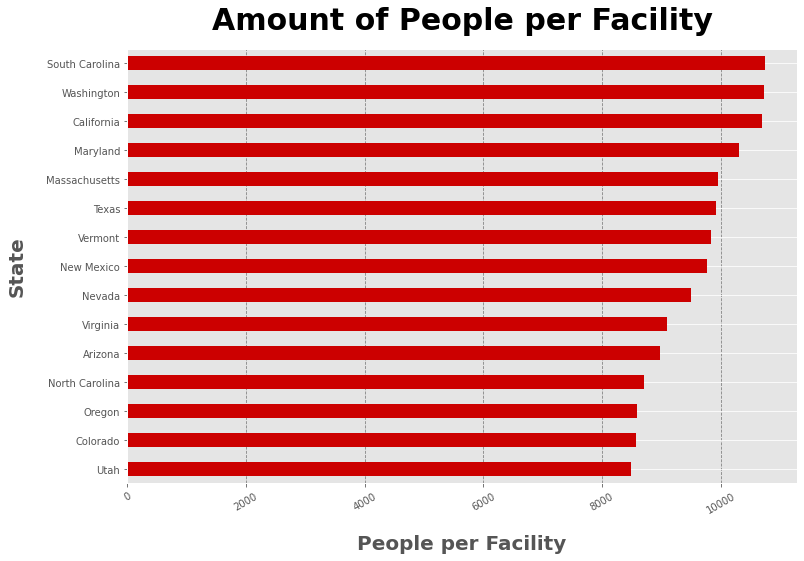

In [ ]:
import matplotlib.pyplot as plt

titleFormat = {'size':30,'weight':'bold','y':1.03}
labelFormatOut = {'size': 20, 'weight': 'bold', 'labelpad': 20}
    

plt.figure(figsize = (12,8))
df.groupby('Full_State')['ratio'].mean().sort_values().tail(15).plot(kind='barh', color = (0.8,0,0))
plt.title('Amount of People per Facility', **titleFormat)
plt.xlabel('People per Facility', **labelFormatOut)
plt.xticks(rotation=30)
plt.ylabel('State', **labelFormatOut)
ax = plt.subplot()
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(df,  # your dataframe with the state values
                    locations='State',  # column with the state abbreviation
                    locationmode='USA-states',  # set the map to show USA states
                    color='ratio',  # column with the value you want to use for shading
                    hover_name='State',  # column to show when hovering over a state
                    title='<b>Population per Facility by State</b>',  # title of the map
                    color_continuous_scale='hot_r',  # set the color scale to 'hot'
                    height=700,  # set the height of the map
                    width=1000)  # set the width of the map

fig.update_layout(
    title_font_size=50, 
    title_x=0.5,
    title_y=0.9
)
fig.update_geos(fitbounds="locations")
fig.show()

In [ ]:
from statsmodels.tsa.ar_model import AR

def predict(s):
  # Create the AR model
  model = AR(s)

  # Fit the model
  model_fit = model.fit()

  # Make predictions
  predictions = model_fit.predict(start=len(s)-1, end=len(s)+9, dynamic=False)
  return predictions


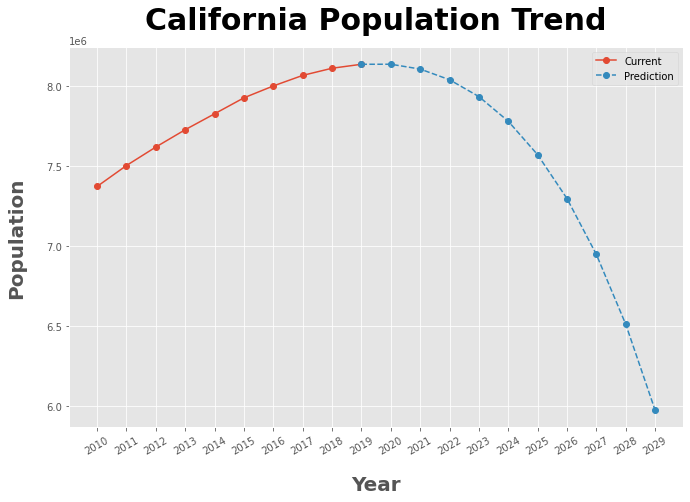

In [ ]:
agedf.NAME.unique
tmp = agedf

df2 = tmp.groupby(tmp.NAME).sum()

df2.drop(df2.columns[[0,1,2,3,4,5,6]], axis = 1, inplace=True)


a = df2.iloc[4]
b = predict(a)

plt.figure(figsize=(11,7))
a.plot(marker='o')
b.plot(marker='o', linestyle='--')
ax = plt.subplot()
ax.set_xticks(range(20))
ax.set_xticklabels(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023','2024', '2025', '2026', '2027', '2028','2029'])
plt.title(a.name + ' Population Trend', **titleFormat)
plt.xlabel('Year', **labelFormatOut)
plt.xticks(rotation=30)
plt.ylabel('Population',**labelFormatOut)
plt.style.use('ggplot')
plt.legend(['Current', 'Prediction'])
plt.show()

In [ ]:
for i in range(51):
  a = df2.iloc[i]
  b = predict(a)
  predicted_rate = b[19]/b[9]
  df.at[i, 'rate'] = predicted_rate
  df.at[i, 'predicted_pop'] = b[14]


In [ ]:
fig = px.choropleth(df,  # your dataframe with the state values
                    locations='State',  # column with the state abbreviation
                    locationmode='USA-states',  # set the map to show USA states
                    color='rate',  # column with the value you want to use for shading
                    hover_name='State',  # column to show when hovering over a state
                    title='<b>Population Growth Patterns</b>',  # title of the map
                    color_continuous_scale='hot_r',  # set the color scale to 'hot'
                    height=700,  # set the height of the map
                    width=1000)  # set the width of the map

fig.update_layout(
    title_font_size=50, 
    title_x=0.5,
    title_y=0.9
)
fig.update_geos(fitbounds="locations")
fig.show()

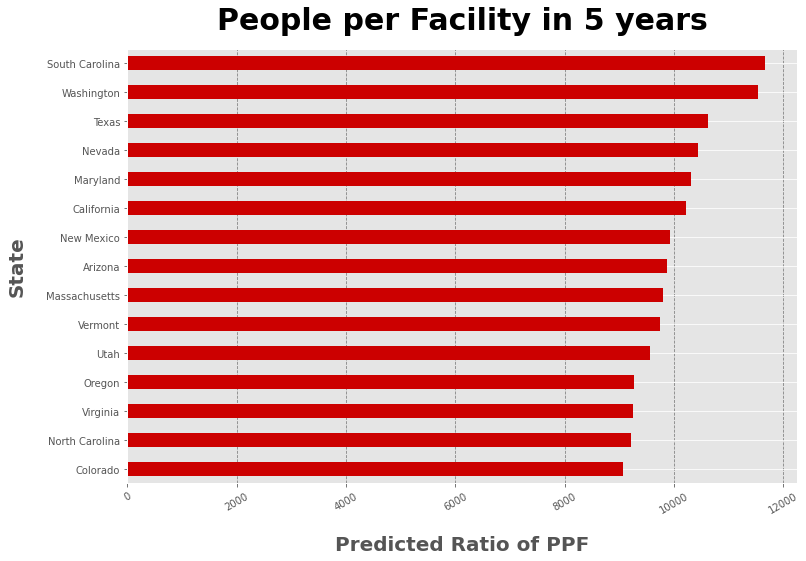

In [ ]:
df['predicted_ratio'] = df['predicted_pop'] / df['facilities']
df['predicted_ratio'] = df['predicted_ratio'].apply(lambda x: round(x, 2))

plt.figure(figsize = (12,8))
df.groupby('Full_State')['predicted_ratio'].mean().sort_values().tail(15).plot(kind='barh', color = (0.8,0,0))
plt.title('People per Facility in 5 years', **titleFormat)
plt.xlabel('Predicted Ratio of PPF', **labelFormatOut)
plt.xticks(rotation=30)
plt.ylabel('State', **labelFormatOut)
ax = plt.subplot()
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

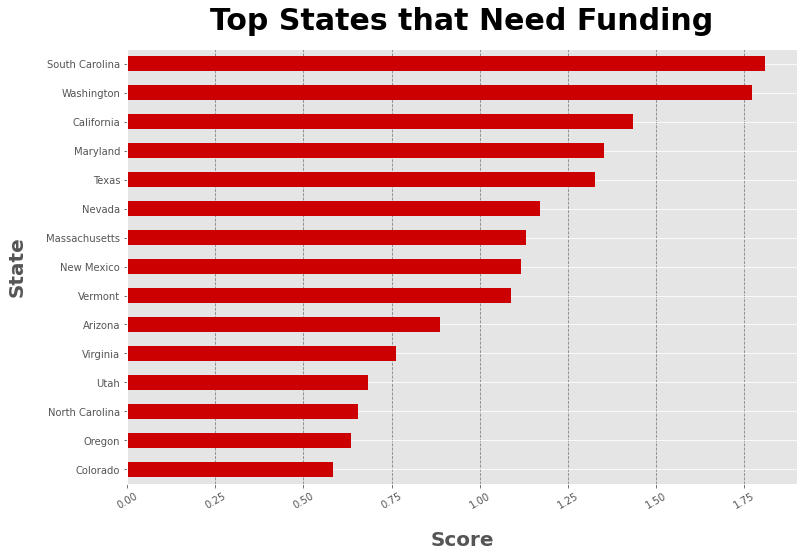

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['predicted_ratio'] = scaler.fit_transform(df[['predicted_ratio']])
df['ratio'] = scaler.fit_transform(df[['ratio']])


df['score'] = (df['predicted_ratio']+df['ratio'])/2


plt.figure(figsize = (12,8))
df.groupby('Full_State')['score'].mean().sort_values().tail(15).plot(kind='barh', color = (0.8,0,0))
plt.title('Top States that Need Funding', **titleFormat)
plt.xlabel('Score', **labelFormatOut)
plt.xticks(rotation=30)
plt.ylabel('State', **labelFormatOut)
ax = plt.subplot()
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [ ]:

filepath = Path('/content/drive/MyDrive/Datathon/results.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  